# Sensitivity Analysis on "Fiber Diameter in Electrospinning" derivated approximation

* Here we try to study the effect of solution density, viscosity, ratio of Q/I and evaporation rate k in order to determine the overall effect of this factors in the terminal radius of the fiber. Then temperature effects and activation energy effects are considered as well.  
    * Data of Q/I was not listed in any of the around 10 papers used. We had to play with the sliders to determine       this ratio and give a value in the same order of magnitude as the expected radius.
    * Solution density was calculated using the densities of PAN and DMF (SOLVENT) 
    * The evaporation rate k was another value not listed in the article with the data, we had to approximate it 
      using another paper found, to try and ballpark the ranges to use. 
    * Viscosity data was listed as a source in the article.
    * Neccesary unit conversions where done either with a calculator or in this jupyter notebook
    
    



In [36]:
# Making the necessary imports to be able to do a sensitivity analysis on two equations.
# Sensitivity analysis was performed using the battery in class example as a guideline. 
import numpy as np
from ipywidgets import widgets, interact
from IPython.display import display
%matplotlib inline
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize
figsize(12, 10)
sbn.set_context("talk", font_scale=1)


In [37]:

pan_w = np.array([5,5.5,6,6.5,7,8,10.5,12])
dmf_w = np.array([95,94.5,94,93.5,93,92,89.5,88])
pan_density = np.array([1184,1184,1184,1184,1184,1184,1184,1184])
dmf_density= np.array([944,944,944,944,944,944,944,944])


$$⍴_t = \frac{(PAN_w\times⍴_p) + (DMF_w\times⍴_s)}{100}$$

```
⍴_t = density of the solution (kg/m^3)
Pan_w = Found as  1184 kg/m^3. # weight percent of Polyacronytrile (PAN)
⍴_p = .# Density of Polyacronytrile (PAN)
DMF_w = Variable from data.  # weight percent of Polyacronytrile (PAN)
⍴_s = Found as 944 kg/m^3. # Density of the solvent DMF
```
Values for the density of PAN and DMF where found from:
```
    https://www.sigmaaldrich.com/catalog/product/sial/227056?lang=en&region=US.
    https://www.sigmaaldrich.com/catalog/product/aldrich/181315?lang=en&region=US

```

Equations syntax (latex) found in examples from class and also:

```
   https://www.authorea.com/users/77723/articles/110898-how-to-write-mathematical-equations-expressions-and- symbols-with-latex-a-cheatsheet

```

In [38]:
# Computing the solution density of a mixture of PAN and DMF
def SolutionDensity(pan_w,
                    dmf_w,
                    pan_density,
                    dmf_density):
    '''Computes the solution density of the mixture of PAN and DMF based on their individual densities'''
                                           
                         
    density = ((pan_w * pan_density) + (dmf_w * dmf_density))/100.
    
    return density

    

In [39]:
SolutionDensity(pan_w,dmf_w,pan_density,dmf_density)

array([956. , 957.2, 958.4, 959.6, 960.8, 963.2, 969.2, 972.8])

$$Radius = (k\times Density\times Viscosity)^\frac{1}{3}\times(\frac{Q}{I})^\frac{2}{3}$$ 

```
Radius = Radius of the fiber (nm)
k = evaporation rate (kg/s*m^2*)*10^-5
Density = Density of the solution was calculated using the previous formula. (kg/m^3)
Viscosity =  Solution Viscosity (cp) 
Q = Variable from data.   Flow rate (m^3/s)
I =  Current in A.
```
Values for k where not listed in the article, we had to try an approximate it using another article:
```
https://www.researchgate.net/figure/The-evaporation-rate-of-PVDF-DMF-solutions-as-function-of-temperature-a-and-of_fig6_243894369

```
Values for density and viscosity where found from the PAN_MODEL_ARTICLE submitted with this code. Values for the ratio of Q/I had to be approximated when doing sensitivity because these where not given.





In [40]:
# Creating the necessary interactive widgets bounded by the limits determined by the Volume fraction tested in 
# " Electrospinning of Polyacrylonitrile Solutions at Elevated Temperatures" paper
@interact(density=widgets.FloatSlider(value=957.2, min= 956., max=972.8, step=1), 
          k=widgets.FloatSlider(value=0.5e-5, min=0.1e-5, max=0.1, step=1e-5), 
          viscosity=widgets.FloatSlider(value=49e-3, min=47e-3, max=2753e-3, step=1e-5), 
          QI=widgets.FloatSlider(value=1e-8, min=1e-8, max=1e-2, step=1e-6))

def radius(k, density, viscosity, QI):
    
    '''Returns the radius as a function of the specified parameters'''
    r = ((k * density * viscosity)**(1/3)) * (QI**(2/3))
    
    return print("The radius is {} m".format(r))


interactive(children=(FloatSlider(value=5e-06, description='k', max=0.1, min=1e-06, step=1e-05), FloatSlider(v…

$$viscosity(T) = viscosity(T_0)\times e^{ \frac{\Delta E}{R}\times (\frac{1}{T} - \frac{1}{T_0})}$$ 

The equation is taken from the Electroppining_Fiber_Diameter_Model, which was submitted with this notebook.
```
viscosity(T_0) = Reference solution viscosity at a known temperature (cp)
Viscosity =  Solution Viscosity at desired temperature (cp) 
Q = Variable from data.   Flow rate (m^3/s)
I = Found as 1144 kg/m^3. # Current in A
E = Activation Energy (J/mol)
T = Actual temperature (K)
T_0 = 298 . #Reference temperature (k)
```
Values for Activation Energy, Reference Temperature and Reference Viscosity where found and approximated from PAN_MODEL_ARTICLE.


In [50]:
@interact(density=widgets.FloatSlider(value=957.2, min= 956., max=972.8, step=1), 
          k=widgets.FloatSlider(value=0.5e-5, min=0.1e-5, max=0.1, step=1e-5), 
          viscosity=widgets.FloatSlider(value=49e-3, min=47e-3, max=2753e-3, step=1e-5), 
          QI=widgets.FloatSlider(value=1e-8, min=1e-8, max=1e-2, step=1e-6),
          T=widgets.FloatSlider(value=298., min=298., max=373., step=1),
          E=widgets.FloatSlider(value=15.1e3, min=15.1e3, max=27.9e3, step=100))

def radius_T(k, density, viscosity, QI,E,T):
    viscosity_0=47e-3 
    R= 8.314 ## J/mol
    T_0=298 ##K 
    viscosity=viscosity_0*np.exp((E/R)*((1/T)-(1/T_0)))
    rf= ((k * density * viscosity)**(1/3)) * (QI**(2/3))
    
    return print("The radius is {} m".format(rf))


interactive(children=(FloatSlider(value=5e-06, description='k', max=0.1, min=1e-06, step=1e-05), FloatSlider(v…

# Morris Method Attempt

In [51]:
# Importing the neccesary libraries to perform The Morris Method.
import SALib
SALib.__version__

'1.1.3'

In [52]:
from SALib.sample import morris as ms
from SALib.analyze import morris as ma
from SALib.plotting import morris as mp

In [53]:
# Defining the Morris Problem
morris_problem = {
    # There are six variables
    'num_vars': 6,
    # These are their names
    'names': ['k', 'density', 'viscosity', 'QI', 'E', 'T'],
    # These are their plausible ranges over which we'll move the variables
    'bounds': [[0.1e-5, 0.1], 
               [944., 1184.],
               [47e-3, 2753e-3], 
               [1e-8, 1e-2], 
               [15.1e3, 27.9e3], 
               [298,373] 
               
              ],
    # I don't want to group any of these variables together
    'groups': None
    }

In [54]:
num_levels = 4
grid_jump = 2
trajectories = int(1e4)
sample = ms.sample(morris_problem, trajectories, num_levels, grid_jump)
sample.shape

(70000, 6)

In [55]:
def r_array(k, density, viscosity, QI,E,T):
    viscosity_0=47e-3 
    R= 8.314 ## J/mol
    T_0=298 ##K 
    viscosity=viscosity_0*np.exp((E/R)*((1/T)-(1/T_0)))
    rf= ((k * density * viscosity)**(1/3)) * (QI**(2/3))
    
    return np.array([rf])


In [56]:
print(sample.T.shape)
print(sample.T)

(6, 70000)
[[1.00000000e-06 1.00000000e-06 1.00000000e-06 ... 3.33340000e-02
  3.33340000e-02 3.33340000e-02]
 [1.10400000e+03 1.10400000e+03 9.44000000e+02 ... 1.02400000e+03
  1.02400000e+03 1.02400000e+03]
 [1.85100000e+00 1.85100000e+00 1.85100000e+00 ... 2.75300000e+00
  2.75300000e+00 2.75300000e+00]
 [6.66667000e-03 6.66667000e-03 6.66667000e-03 ... 1.00000000e-02
  1.00000000e-02 1.00000000e-02]
 [2.79000000e+04 1.93666667e+04 1.93666667e+04 ... 2.36333333e+04
  1.51000000e+04 1.51000000e+04]
 [3.23000000e+02 3.23000000e+02 3.23000000e+02 ... 3.23000000e+02
  3.23000000e+02 3.73000000e+02]]


In [57]:
# Run the sample through the power model
output = r_array(*sample.T)
print(output.shape)
print(output)

(1, 70000)
[[0.00098806 0.00107988 0.00102497 ... 0.04248292 0.04643078 0.03611519]]


In [58]:
# Store the results for plotting of the analysis
Si = ma.analyze(morris_problem, 
                sample, 
                output, 
                print_to_console=False, 
                grid_jump=grid_jump, 
                num_levels=num_levels)
print("{:20s} {:>7s} {:>7s} {:>7s}".format("Name", "mu", "mu_star", "sigma"))
for name, s1, st, mean in zip(morris_problem['names'], Si['mu'], Si['mu_star'], Si['sigma']):
    print("{:20s} {:=7.2f} {:=7.2f} {:=7.2f}".format(name, s1, st, mean))

Name                      mu mu_star   sigma
k                       0.03    0.03    0.03
density                 0.00    0.00    0.00
viscosity               0.00    0.00    0.00
QI                      0.04    0.04    0.03
E                    -  0.00    0.00    0.00
T                    -  0.01    0.01    0.01


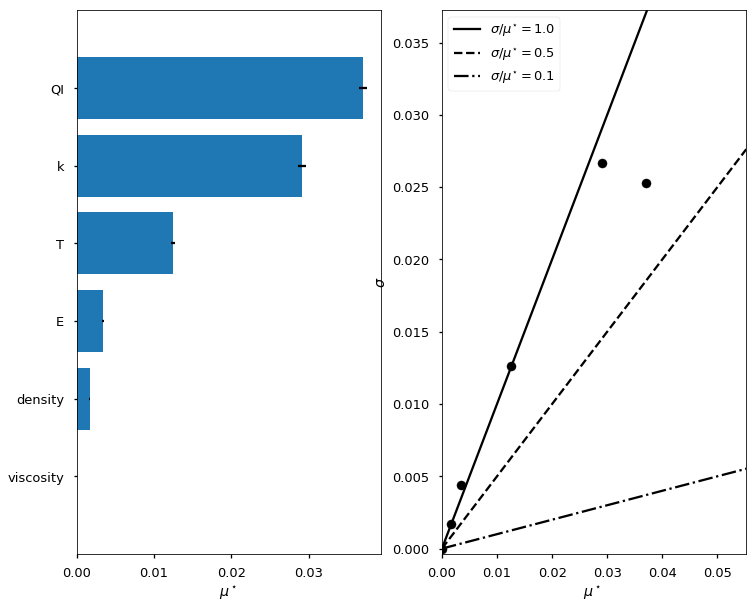

In [59]:
fig, (ax1, ax2) = plt.subplots(1,2)
mp.horizontal_bar_plot(ax1, Si, param_dict={})
mp.covariance_plot(ax2, Si, {})

# MIT Zoom Model Equation Sensitivity Analysis

* Here we try to study the effect of Surface Tension, Volume Fraction of the polymer and the ratio of Q/I (Where Q   is flowrate and I is Current) in the expected radius diameter.
    * Data of Q/I was not listed in any of the around 10 papers used. We had to play with the sliders to determine       this ratio and give a value in the same order of magnitude as the expected radius.
    * The volume fraction was determined considering we had an ideal solution,  in other words, the thermodynamic       effects had to be ignored considering the interaction parameter needed to Apply Flory-Huggins Theory was not       there, as well as either the solution volume fraction or the polymer volume fraction. Too many variables to       solve for. 
    



In [61]:
@interact(SurfaceTension=widgets.FloatSlider(value=36.3, min= 1., max=100., step=1), 
          vfrac=widgets.FloatSlider(value=.05, min=0.01, max=0.99, step=1e-2), 
          QI=widgets.FloatSlider(value=1e-8, min=1e-8, max=1e-2, step=1e-6))

def radius(SurfaceTension, vfrac, QI):
    r = ((SurfaceTension**(1/3)) * (QI**(2/3)) *  vfrac**(1/2))/2
   
    return print("The radius is {} m".format(r))

interactive(children=(FloatSlider(value=36.3, description='SurfaceTension', min=1.0, step=1.0), FloatSlider(va…

# Morris Analysis Attempt

In [62]:
morris_problem_2 = {
    # There are 3 variables
    'num_vars': 3,
    # These are their names
    'names': ['SurfaceTension', 'vfrac', 'QI'],
    # These are their plausible ranges over which we'll move the variables
    'bounds': [[1, 100], 
               [.01, .9],
               [1e-8, 1e-2], 
              ],
    # I don't want to group any of these variables together
    'groups': None
    }

In [63]:
num_levels = 4
grid_jump = 2
trajectories = int(1e4)
sample_2 = ms.sample(morris_problem_2, trajectories, num_levels, grid_jump)
sample_2.shape

(40000, 3)

$$Radius = \frac{𝜸^{\frac{1}{3}}\times(\frac{Q}{I})^\frac{2}{3} \times v_p^\frac{1}{2}}{2}$$


The equation is taken from the Electroppining_Fiber_Diameter_Model, which was submitted with this notebook.
```
Radius = Radius of the fiber (nm)
𝜸 = Surface Tension (dyn/cm)
v_p = volume fraction of the polymer. 
Q = Variable from data (not given). Flow rate (m^3/s)
I =  Variable from data (not given). Current in A.
```
𝜸 ranges were chosen centered at 36.3 (dyn/cm) since the theorethical data from the PAN_MODEL_ARTICLE where measured at constant surface tension. 

Equations syntax (latex) found in examples from class and also:

```
   https://www.authorea.com/users/77723/articles/110898-how-to-write-mathematical-equations-expressions-and- symbols-with-latex-a-cheatsheet

```


In [64]:
def r_array_2(SurfaceTension, vfrac, QI):
    ''' Function that returns an array of the radius found using the zoom model equation'''
    r2 = ((SurfaceTension**(1/3)) * (QI**(2/3)) *  vfrac**(1/2))/2
   
    return np.array([r2])

In [65]:
print(sample_2.T.shape)
print(sample_2.T)

(3, 40000)
[[1.00000000e+00 1.00000000e+00 6.70000000e+01 ... 1.00000000e+00
  1.00000000e+00 6.70000000e+01]
 [3.06666667e-01 3.06666667e-01 3.06666667e-01 ... 3.06666667e-01
  3.06666667e-01 3.06666667e-01]
 [1.00000000e-02 3.33334000e-03 3.33334000e-03 ... 1.00000000e-08
  6.66667000e-03 6.66667000e-03]]


In [66]:
# Run the sample through the radius model
output_2 = r_array_2(*sample_2.T)
print(output_2.shape)
print(output_2)

(1, 40000)
[[1.28519775e-02 6.17859459e-03 2.50946591e-02 ... 1.28519775e-06
  9.80789775e-03 3.98352485e-02]]


In [67]:
# Store the results for plotting of the analysis
Si = ma.analyze(morris_problem_2, 
                sample_2, 
                output_2, 
                print_to_console=False, 
                grid_jump=grid_jump, 
                num_levels=num_levels)
print("{:20s} {:>7s} {:>7s} {:>7s}".format("Name", "mu", "mu_star", "sigma"))
for name, s1, st, mean in zip(morris_problem_2['names'], Si['mu'], Si['mu_star'], Si['sigma']):
    print("{:20s} {:=7.2f} {:=7.2f} {:=7.2f}".format(name, s1, st, mean))

Name                      mu mu_star   sigma
SurfaceTension          0.03    0.03    0.03
vfrac                   0.03    0.03    0.03
QI                      0.04    0.04    0.03


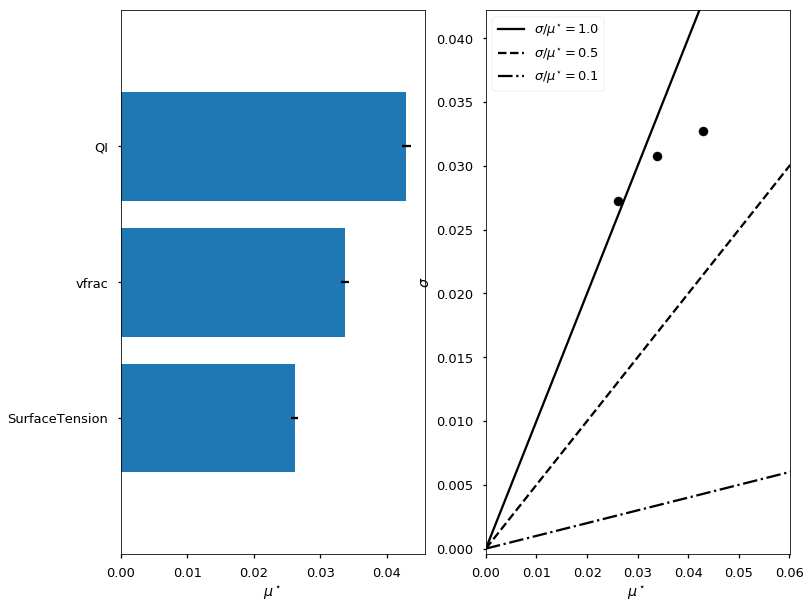

In [68]:
fig, (ax1, ax2) = plt.subplots(1,2)
mp.horizontal_bar_plot(ax1, Si, param_dict={})
mp.covariance_plot(ax2, Si, {})